In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data=pd.read_csv('C:/Users/Virag/Desktop/Machine Learning/practice2/data/heart_disease.csv')
labels=data.values[:,-1]
labels[labels>1]=1
labels=labels.astype(int)

data=data.values[:,:-1]



In [2]:
# Only run before decision boundary visualization
data=data[:,[3,7]]

(303, 2)


In [3]:
#Standardize data (substract mean divide with std)
data= data-np.mean(data)/np.std(data)

In [4]:
def visualize(data,labels,predictor):
    import matplotlib.pyplot as plt
    min1, max1 = data[:, 0].min()-data[:, 0].min()*0.1, data[:, 0].max()+data[:, 0].max()*0.1
    min2, max2 = data[:, 1].min()-data[:, 1].min()*0.1, data[:, 1].max()+data[:, 1].max()*0.1
    # define the x and y scale
    x1grid = np.arange(min1, max1, np.abs(max1-min1)*0.001)
    x2grid = np.arange(min2, max2, np.abs(max2-min2)*0.001)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    print(grid.shape)
    yhat = predictor.predict(grid) 
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in np.unique(labels):
        # get row indexes for samples with this class
        row_ix = np.where(labels == class_value)
        # create scatter of these samples
        plt.scatter(data[row_ix, 0], data[row_ix, 1], cmap='Paired')
    plt.tight_layout()


In [5]:
class LogisticRegression():
    def __init__(self):
        self.w_hat = None
    def fit(self,data,labels,max_iterations=500):
        #making the bias:
        ones = np.ones(labels.shape)
        dat = np.hstack((data,np.atleast_2d(ones).T))
        self.w_hat = np.ones((1,dat.shape[1])) 

        num = np.round(dat.shape[0]*0.8)
        num = int(num)
        train_set, test_set = dat[:num], dat[num:]
        train_labels, test_labels = labels[:num], labels[num:]


        #todo:
        for i in range(50): #training iteration ->max_iterations
            errors = []
            for epoch in range(train_set.shape[0]):
                #print("EPOCH " + str(epoch))
                err = self.error_gradient(train_set,train_labels,self.predict(train_set))
                errors.append(err)
            
            batch_error = np.mean(errors)
            #print("Batch error: " + str(batch_error))
            print("Accuracy on training set: " + str(self.accuracy(train_labels,self.predict(train_set))))
            print("Accuracy on test set: " + str(self.accuracy(test_labels,self.predict(test_set))))
            self.w_hat = self.w_hat - batch_error

        #separate the bias:
        self.bias = self.w_hat[-1]
        self.w_hat = self.w_hat[:,:-1]

    def sigmoid(self,data):
        return 1/(1+ np.exp(data))

    def binary_cross_entropy(self,true,prediction): 
        return -(true * np.log2(prediction + 0.0001) + (1 - true) * np.log2(1 - prediction + 0.0001)) 

    def error_gradient(self,data,true,prediction): 
        return np.transpose(data)*(prediction-true)

    def predict(self,data):  #!!!!
        pred = self.w_hat@np.transpose(data)
        return self.sigmoid(pred) 

    def accuracy(self,true,prediction):
        N = true.shape[0]
        accuracy = (true == prediction).sum() / N
        return accuracy

    def most_influental_feature(self):
        print("the most influental feature is: " + str(np.max(self.w_hat)))
 

In [7]:
#train_data,test_data,train_labels,test_labels = train_test_split(data,labels)
lr=LogisticRegression()
lr.fit(data,labels)
prediction_in=lr.predict(data)
prediction_out=lr.predict(data)
print(lr.accuracy(labels,prediction_in))
print(lr.accuracy(labels,prediction_out))


Accuracy on training set: 0.0
Accuracy on test set: 0.0
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374


C:\Users\Virag\AppData\Local\Temp/ipykernel_5560/2619441869.py:35: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(data))


Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.5578512396694215
Accuracy on test set: 0.47540983606557374
Accuracy on training set: 0.557851239669421

In [7]:
lr.binary_cross_entropy(labels,labels)
lr.error_gradient(data,labels,labels)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

(1001000, 2)


C:\Users\Virag\AppData\Local\Temp/ipykernel_5560/2619441869.py:35: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(data))


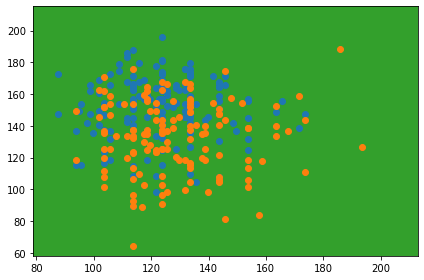

In [8]:
visualize(data,labels,lr)

In [16]:
lr.most_influental_feature()

the most influental feature is: 1937.6182512608482
